In [12]:
import pandas as pd
import matplotlib.pyplot as plt  
bike_rentals = pd.read_csv('bike_rental_hour.csv')

In [3]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


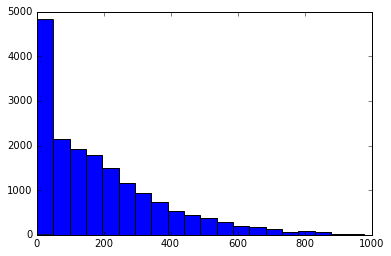

In [15]:
%matplotlib inline
plt.hist(bike_rentals['cnt'], 20)
plt.show()

In [35]:
bike_rentals.corr()['cnt'].sort_values()

time_label   -0.378318
hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [27]:
def assign_label(c):
    if c >= 0 and c < 6:
        return 4
    elif c >= 6 and c < 12:
        return 1
    elif c >= 12 and c < 18:
         return 2
    elif c >= 18 and c < 24:
        return 3
        

In [34]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(lambda x: assign_label(x))
bike_rentals['time_label'].head()

0    4
1    4
2    4
3    4
4    4
Name: time_label, dtype: int64

In [33]:
train = bike_rentals.sample(n = int(len(bike_rentals)*0.8), random_state=1)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]


In [43]:
factors = abs(bike_rentals.corr()['cnt'].sort_values())
factorstrue = factors[factors > 0.3]
factorstrue = factorstrue[factorstrue < 0.6]
factorstrue


time_label    0.378318
hum           0.322911
hr            0.394071
atemp         0.400929
temp          0.404772
Name: cnt, dtype: float64

In [48]:
factorstrue

AttributeError: 'Series' object has no attribute 'names'